Calcular volatilidad de activos

In [30]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from csv import reader

In [67]:
#Leer de un archivo CSV el listado de indices a analizar.
with open('C:/Users/alvar/OneDrive/Escritorio/Analisis bolsa/Analisis tecnico/ValoresAnalizar/IndicesSYP500.csv', 'r') as archivo:
     leer = reader(archivo)
     lista2D = list(leer)

lista2D.pop(0) #Elimina primer elemento de la lista
        
# #Declaramos tickers
tickers = [] 
for item in lista2D:
    #Añadir elementos a la lista 1D
    tickers += item
    #Visulaizar resultados de la lista plana o 1D
print(tickers)

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'ADP', 'AAP', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AOS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'BRO', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CHRW', 'CRL', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DE',

In [68]:
df_stocks = yf.download(tickers, start='2010-01-01')["Adj Close"]

[*********************100%***********************]  331 of 331 completed


In [69]:
df_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,PEAK,PODD,RE,SJM,STZ,T,TAP,TECH,XOM,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.268343,4.496875,36.703857,6.505279,NaN,21.831717,19.336393,7.994444,32.708149,37.090000,...,13.854838,15.03,64.369431,43.926792,14.481030,7.851906,33.574768,14.866830,41.677624,32.122612
2010-01-05,20.048172,5.005957,36.485706,6.516529,NaN,21.675953,19.180176,7.967778,32.910301,37.700001,...,13.817979,15.00,63.435322,43.721928,14.301360,7.813442,33.172623,14.739113,41.840336,31.740746
2010-01-06,19.976938,4.798554,36.803829,6.412874,NaN,21.471003,19.286684,7.933333,33.260166,37.619999,...,13.735044,14.67,63.412766,43.877354,14.490006,7.736686,33.136074,14.700154,42.201965,31.949852
2010-01-07,19.951036,4.939965,36.794746,6.401018,NaN,21.126678,19.446468,7.886667,33.229061,36.889999,...,13.923949,14.80,63.540783,43.757252,14.346275,7.649820,32.580399,14.734785,42.069363,32.368114
2010-01-08,19.944565,4.845692,36.940182,6.443574,NaN,21.356230,19.545889,7.871111,33.096889,36.689999,...,14.016103,14.06,63.427818,43.856163,14.067796,7.593779,32.536526,14.706644,41.900604,32.368114


In [70]:
df_stocks = df_stocks.dropna(1)#Eliminamos aquellos activos que contengan valores nulos(columnas)

C:\Users\alvar\AppData\Local\Temp\ipykernel_7272\3282167033.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_stocks = df_stocks.dropna(1)


In [71]:
df_stocks.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,PEAK,PODD,RE,SJM,STZ,T,TAP,TECH,XOM,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.268343,4.496875,36.703857,6.505279,21.831717,19.336393,7.994444,32.708149,37.090000,22.960764,...,13.854838,15.03,64.369431,43.926792,14.481030,7.851906,33.574768,14.866830,41.677624,32.122612
2010-01-05,20.048172,5.005957,36.485706,6.516529,21.675953,19.180176,7.967778,32.910301,37.700001,22.924513,...,13.817979,15.00,63.435322,43.721928,14.301360,7.813442,33.172623,14.739113,41.840336,31.740746
2010-01-06,19.976938,4.798554,36.803829,6.412874,21.471003,19.286684,7.933333,33.260166,37.619999,22.881010,...,13.735044,14.67,63.412766,43.877354,14.490006,7.736686,33.136074,14.700154,42.201965,31.949852
2010-01-07,19.951036,4.939965,36.794746,6.401018,21.126678,19.446468,7.886667,33.229061,36.889999,22.699766,...,13.923949,14.80,63.540783,43.757252,14.346275,7.649820,32.580399,14.734785,42.069363,32.368114
2010-01-08,19.944565,4.845692,36.940182,6.443574,21.356230,19.545889,7.871111,33.096889,36.689999,22.830263,...,14.016103,14.06,63.427818,43.856163,14.067796,7.593779,32.536526,14.706644,41.900604,32.368114


Una vez obtenido el dataframe con los Activos y datos deseados calcularemos los 10 activos con menor volatilidad

In [72]:
stocks_volatility = df_stocks.pct_change().std() * np.sqrt(252)
#Sobre el porcentaje de cambio pct-change se aplica la desviación estandar para calcular la volatilidad
#Se multiplica por la raiz cuadrada de 252 que son el número de días que se puede operar en bolsa al año

In [73]:
stocks_volatility.head()

A       0.288018
AAL     0.527823
AAP     0.312102
AAPL    0.286095
ABC     0.250638
dtype: float64

In [77]:
#stocks_low_volatility = stocks_volatility[stocks_volatility < 0.2].index
#Me daria aquellos menores de 0.2
#Para obtener por ejemplo los 10 con menor volatilidad
stocks_low_volatility = stocks_volatility.nsmallest(10)
stocks_low_volatility

JNJ    0.168492
KO     0.174393
CL     0.181957
KMB    0.184221
DUK    0.188411
MCD    0.188569
ED     0.190453
GIS    0.191531
AEP    0.194289
K      0.194599
dtype: float64

In [78]:
# Si quisiera aplicar los mismos pesos(cantidad) a mi cartera basandome solo en la volatilidad 
#sería dividir 1 entre el numero de activos
pesos = np.repeat(1/len(stocks_low_volatility), len(stocks_low_volatility))

In [86]:
#Aquí creo un nuevo dataframe con los pesos y la volatilidad
df_stocks_portfolio = pd.DataFrame({
    'volatility' : stocks_low_volatility.values,
    'pesos' : pesos
}, index = stocks_low_volatility.index)

In [87]:
df_stocks_portfolio

,volatility,pesos
JNJ,0.168492,0.1
KO,0.174393,0.1
CL,0.181957,0.1
KMB,0.184221,0.1
DUK,0.188411,0.1
MCD,0.188569,0.1
ED,0.190453,0.1
GIS,0.191531,0.1
AEP,0.194289,0.1
K,0.194599,0.1


In [88]:
#Para filtrar en el portfolio de todos los activos solo los de menor volatilidad hariamos esto:
df_stocks_portfolio_returns = df_stocks[stocks_low_volatility.index].pct_change().dropna()

In [89]:
#Estos serían los retornos del portafolio
df_stocks_portfolio_returns

,JNJ,KO,CL,KMB,DUK,MCD,ED,GIS,AEP,K
Date,,,,,,,,,,
2010-01-05,-0.011596,-0.012097,0.008087,0.000778,-0.016500,-0.007646,-0.013002,-0.009309,-0.011448,0.002271
2010-01-06,0.008134,-0.000355,-0.002275,-0.012282,0.003595,-0.013644,0.010716,0.005980,0.010133,0.000189
2010-01-07,-0.007137,-0.002485,-0.003961,-0.006611,0.004776,0.007323,-0.003534,0.016104,0.008598,0.009818
2010-01-08,0.003438,-0.018509,-0.017951,-0.006338,0.000594,-0.000969,0.003104,-0.008135,0.011936,-0.001870
2010-01-11,0.000156,0.020308,-0.004417,-0.001276,0.010095,0.007762,0.012597,0.000990,0.010390,0.000562
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,-0.000611,0.002338,0.011153,0.006626,0.002124,0.006188,0.006499,0.008349,0.002489,0.014620
2023-05-02,0.008741,-0.004510,0.001983,0.000206,-0.015037,0.001647,-0.005449,-0.004140,-0.014787,0.005509
2023-05-03,-0.013089,-0.005624,0.005071,-0.002057,-0.002766,-0.009562,-0.005377,-0.001910,-0.004492,0.004917


In [90]:
#Si quisieramos calcular el retorno total del portafolio multiplicaremos cada uno de los retornos por el peso que elegimos
df_stocks_portfolio_returns = df_stocks_portfolio_returns.dot(df_stocks_portfolio.pesos)

In [91]:
#Si quisieramos ver la grafica calculariamos los retornos acumulados
df_stocks_portfolio_acumulative_returns = (df_stocks_portfolio_returns + 1).cumprod()


<Axes: xlabel='Date'>

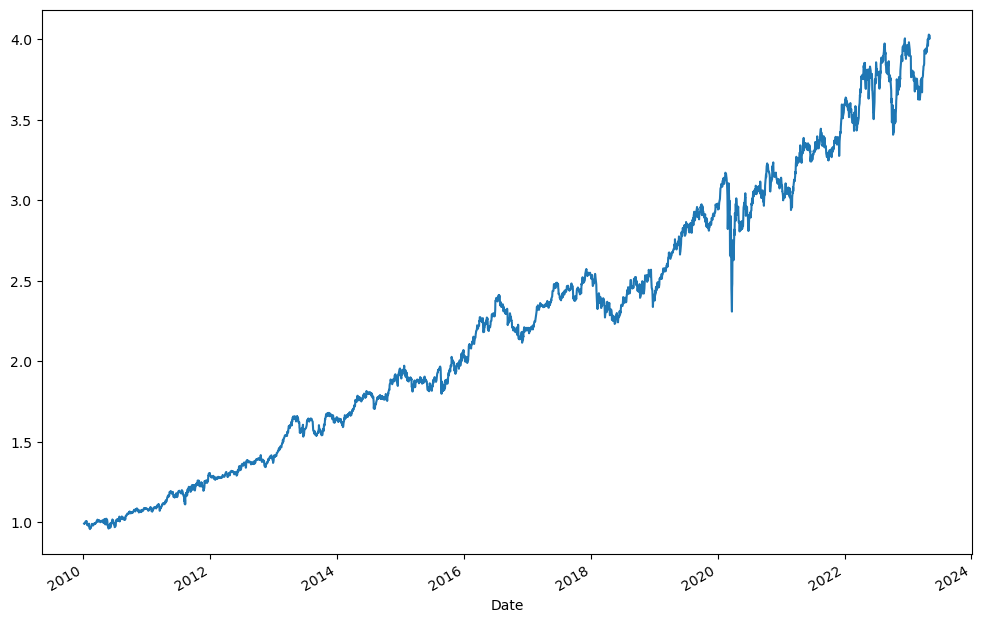

In [92]:
df_stocks_portfolio_acumulative_returns.plot(figsize=(12,8))